# Lecture 10

## Exercise 10.1
Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

### Implementation

**Number of cores**: 4

$N_{migr}$: 100

In [337]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

In [338]:
best_file_names = [
    "Exercise_10.1/OUTPUT/history_best_rank_0.txt",
    "Exercise_10.1/OUTPUT/history_best_rank_1.txt",
    "Exercise_10.1/OUTPUT/history_best_rank_2.txt",
    "Exercise_10.1/OUTPUT/history_best_rank_3.txt"
]

avg_file_names = [
    "Exercise_10.1/OUTPUT/history_half_avg_rank_0.txt",
    "Exercise_10.1/OUTPUT/history_half_avg_rank_1.txt",
    "Exercise_10.1/OUTPUT/history_half_avg_rank_2.txt",
    "Exercise_10.1/OUTPUT/history_half_avg_rank_3.txt"
]

best_path_file_names = [
    "Exercise_10.1/OUTPUT/best_rank_0.txt",
    "Exercise_10.1/OUTPUT/best_rank_1.txt",
    "Exercise_10.1/OUTPUT/best_rank_2.txt",
    "Exercise_10.1/OUTPUT/best_rank_3.txt"
]

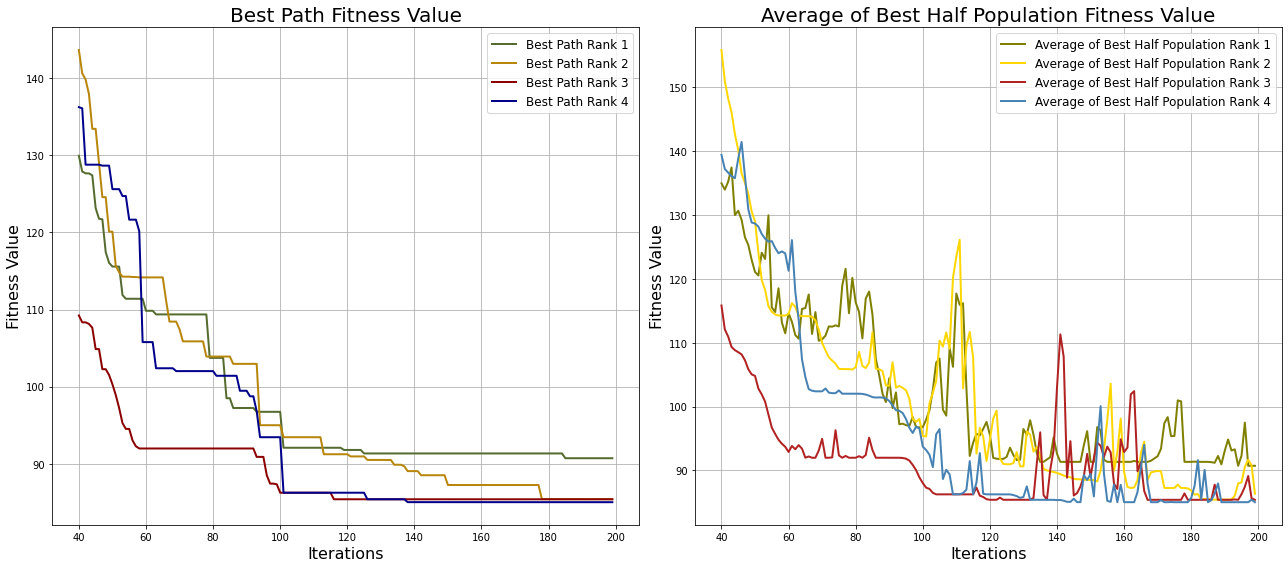

In [339]:
kmin = 40
best_colours = ["darkolivegreen", "darkgoldenrod", "darkred", "darkblue"]
half_colours = ["olive", "gold", "firebrick", "steelblue"]

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for idx in range(len(best_file_names)):
    square_best = np.loadtxt(best_file_names[idx])
    plt.plot(square_best[kmin:, 0], square_best[kmin:, 1], '-', color=best_colours[idx], label=f'Best Path Rank {idx+1}', linewidth=2)

plt.title("Best Path Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
for idx in range(len(avg_file_names)):
    square_avg = np.loadtxt(avg_file_names[idx])
    plt.plot(square_avg[kmin:, 0], square_avg[kmin:, 1], '-', color=half_colours[idx], label=f'Average of Best Half Population Rank {idx+1}', linewidth=2)

plt.title("Average of Best Half Population Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

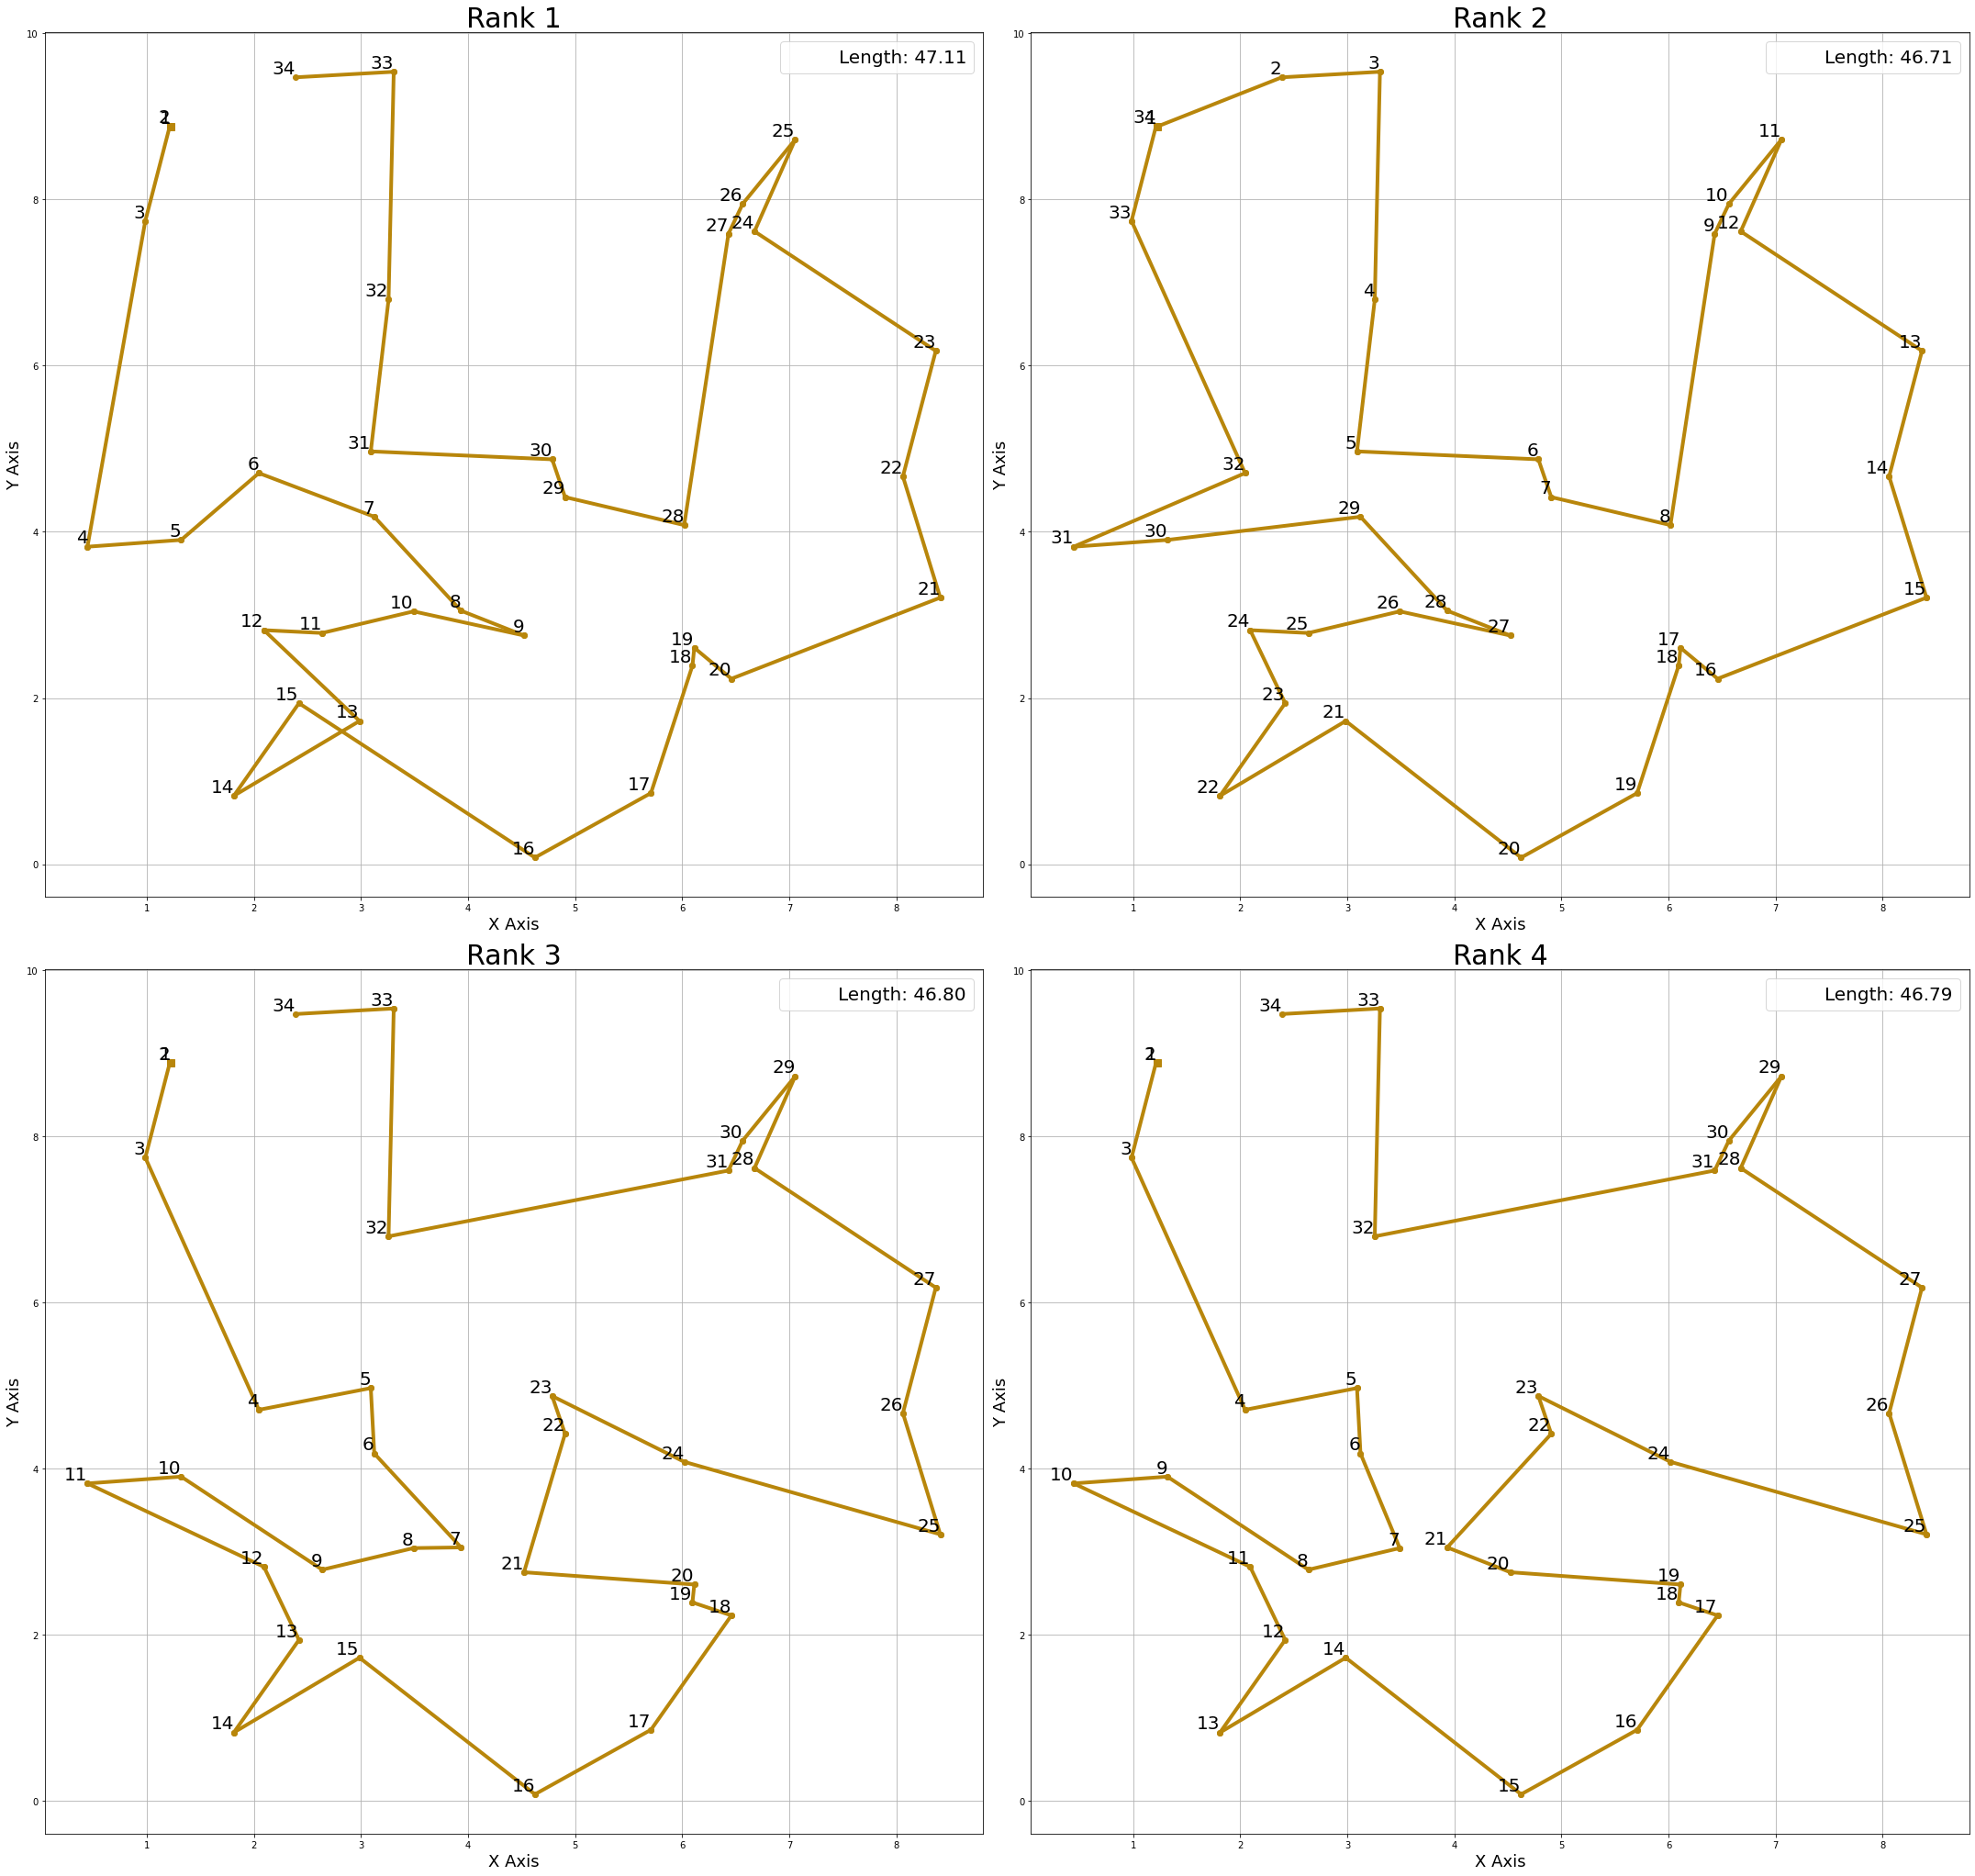

In [340]:
plt.figure(figsize=(30, 30))
line_color = 'darkgoldenrod'

for idx, file_name in enumerate(best_path_file_names):
    data = np.loadtxt(file_name)

    x = data[:, 0]
    y = data[:, 1]

    # Calculate fitness as the total distance of the path, including the return to the start
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    total_distance = np.sum(distances) + np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)

    plt.subplot(2, 2, idx + 1)
    for i in range(len(x) - 1):
        # Line
        plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color=line_color, marker='o', linewidth=4)
        if i == 0 or i == len(x) - 1:
            plt.plot(x[i], y[i], color=line_color, marker='s', markersize=8)
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    plt.text(x[-1], y[-1], str(len(x)), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    custom_label = "Length: {:.2f}".format(total_distance)
    custom_line = Line2D([0], [1], linestyle="none", marker="", color='none', label=custom_label)

    plt.title(f"Rank {idx + 1}", fontsize=30)
    plt.xlabel('X Axis', fontsize=18)
    plt.ylabel('Y Axis', fontsize=18)
    plt.legend(handles=[custom_line], loc='upper right', fontsize=20)
    plt.grid(True)

plt.subplots_adjust(top=0.9)  # Adjust the top space to create space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Further adjust the layout to ensure no overlap with the main title
plt.show()

## Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

### Implementation

**Number of cores**: 4

$N_{migr}$: 50

**Population dimension**: 1000

**Number of generations**: 5000

### Indipendent Search

In [341]:
best_file_names = [
    "Exercise_10.2/OUTPUT/history_best_rank_0_I.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_1_I.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_2_I.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_3_I.txt",
]

avg_file_names = [
    "Exercise_10.2/OUTPUT/history_half_avg_rank_0_I.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_1_I.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_2_I.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_3_I.txt"
]

best_path_file_names = [
    "Exercise_10.2/OUTPUT/best_rank_0_I.txt",
    "Exercise_10.2/OUTPUT/best_rank_1_I.txt",
    "Exercise_10.2/OUTPUT/best_rank_2_I.txt",
    "Exercise_10.2/OUTPUT/best_rank_3_I.txt",
]

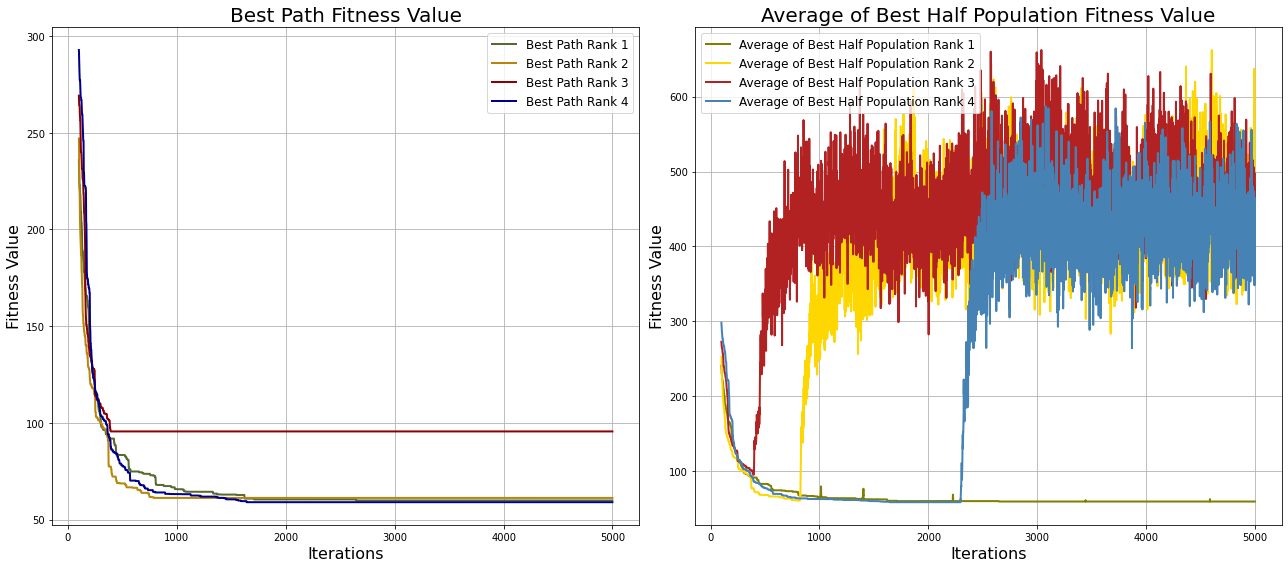

In [342]:
kmin = 100
best_colours = ["darkolivegreen", "darkgoldenrod", "darkred", "darkblue"]
half_colours = ["olive", "gold", "firebrick", "steelblue"]

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for idx in range(len(best_file_names)):
    square_best = np.loadtxt(best_file_names[idx])
    plt.plot(square_best[kmin:, 0], square_best[kmin:, 1], '-', color=best_colours[idx], label=f'Best Path Rank {idx+1}', linewidth=2)

plt.title("Best Path Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
for idx in range(len(avg_file_names)):
    square_avg = np.loadtxt(avg_file_names[idx])
    plt.plot(square_avg[kmin:, 0], square_avg[kmin:, 1], '-', color=half_colours[idx], label=f'Average of Best Half Population Rank {idx+1}', linewidth=2)

plt.title("Average of Best Half Population Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

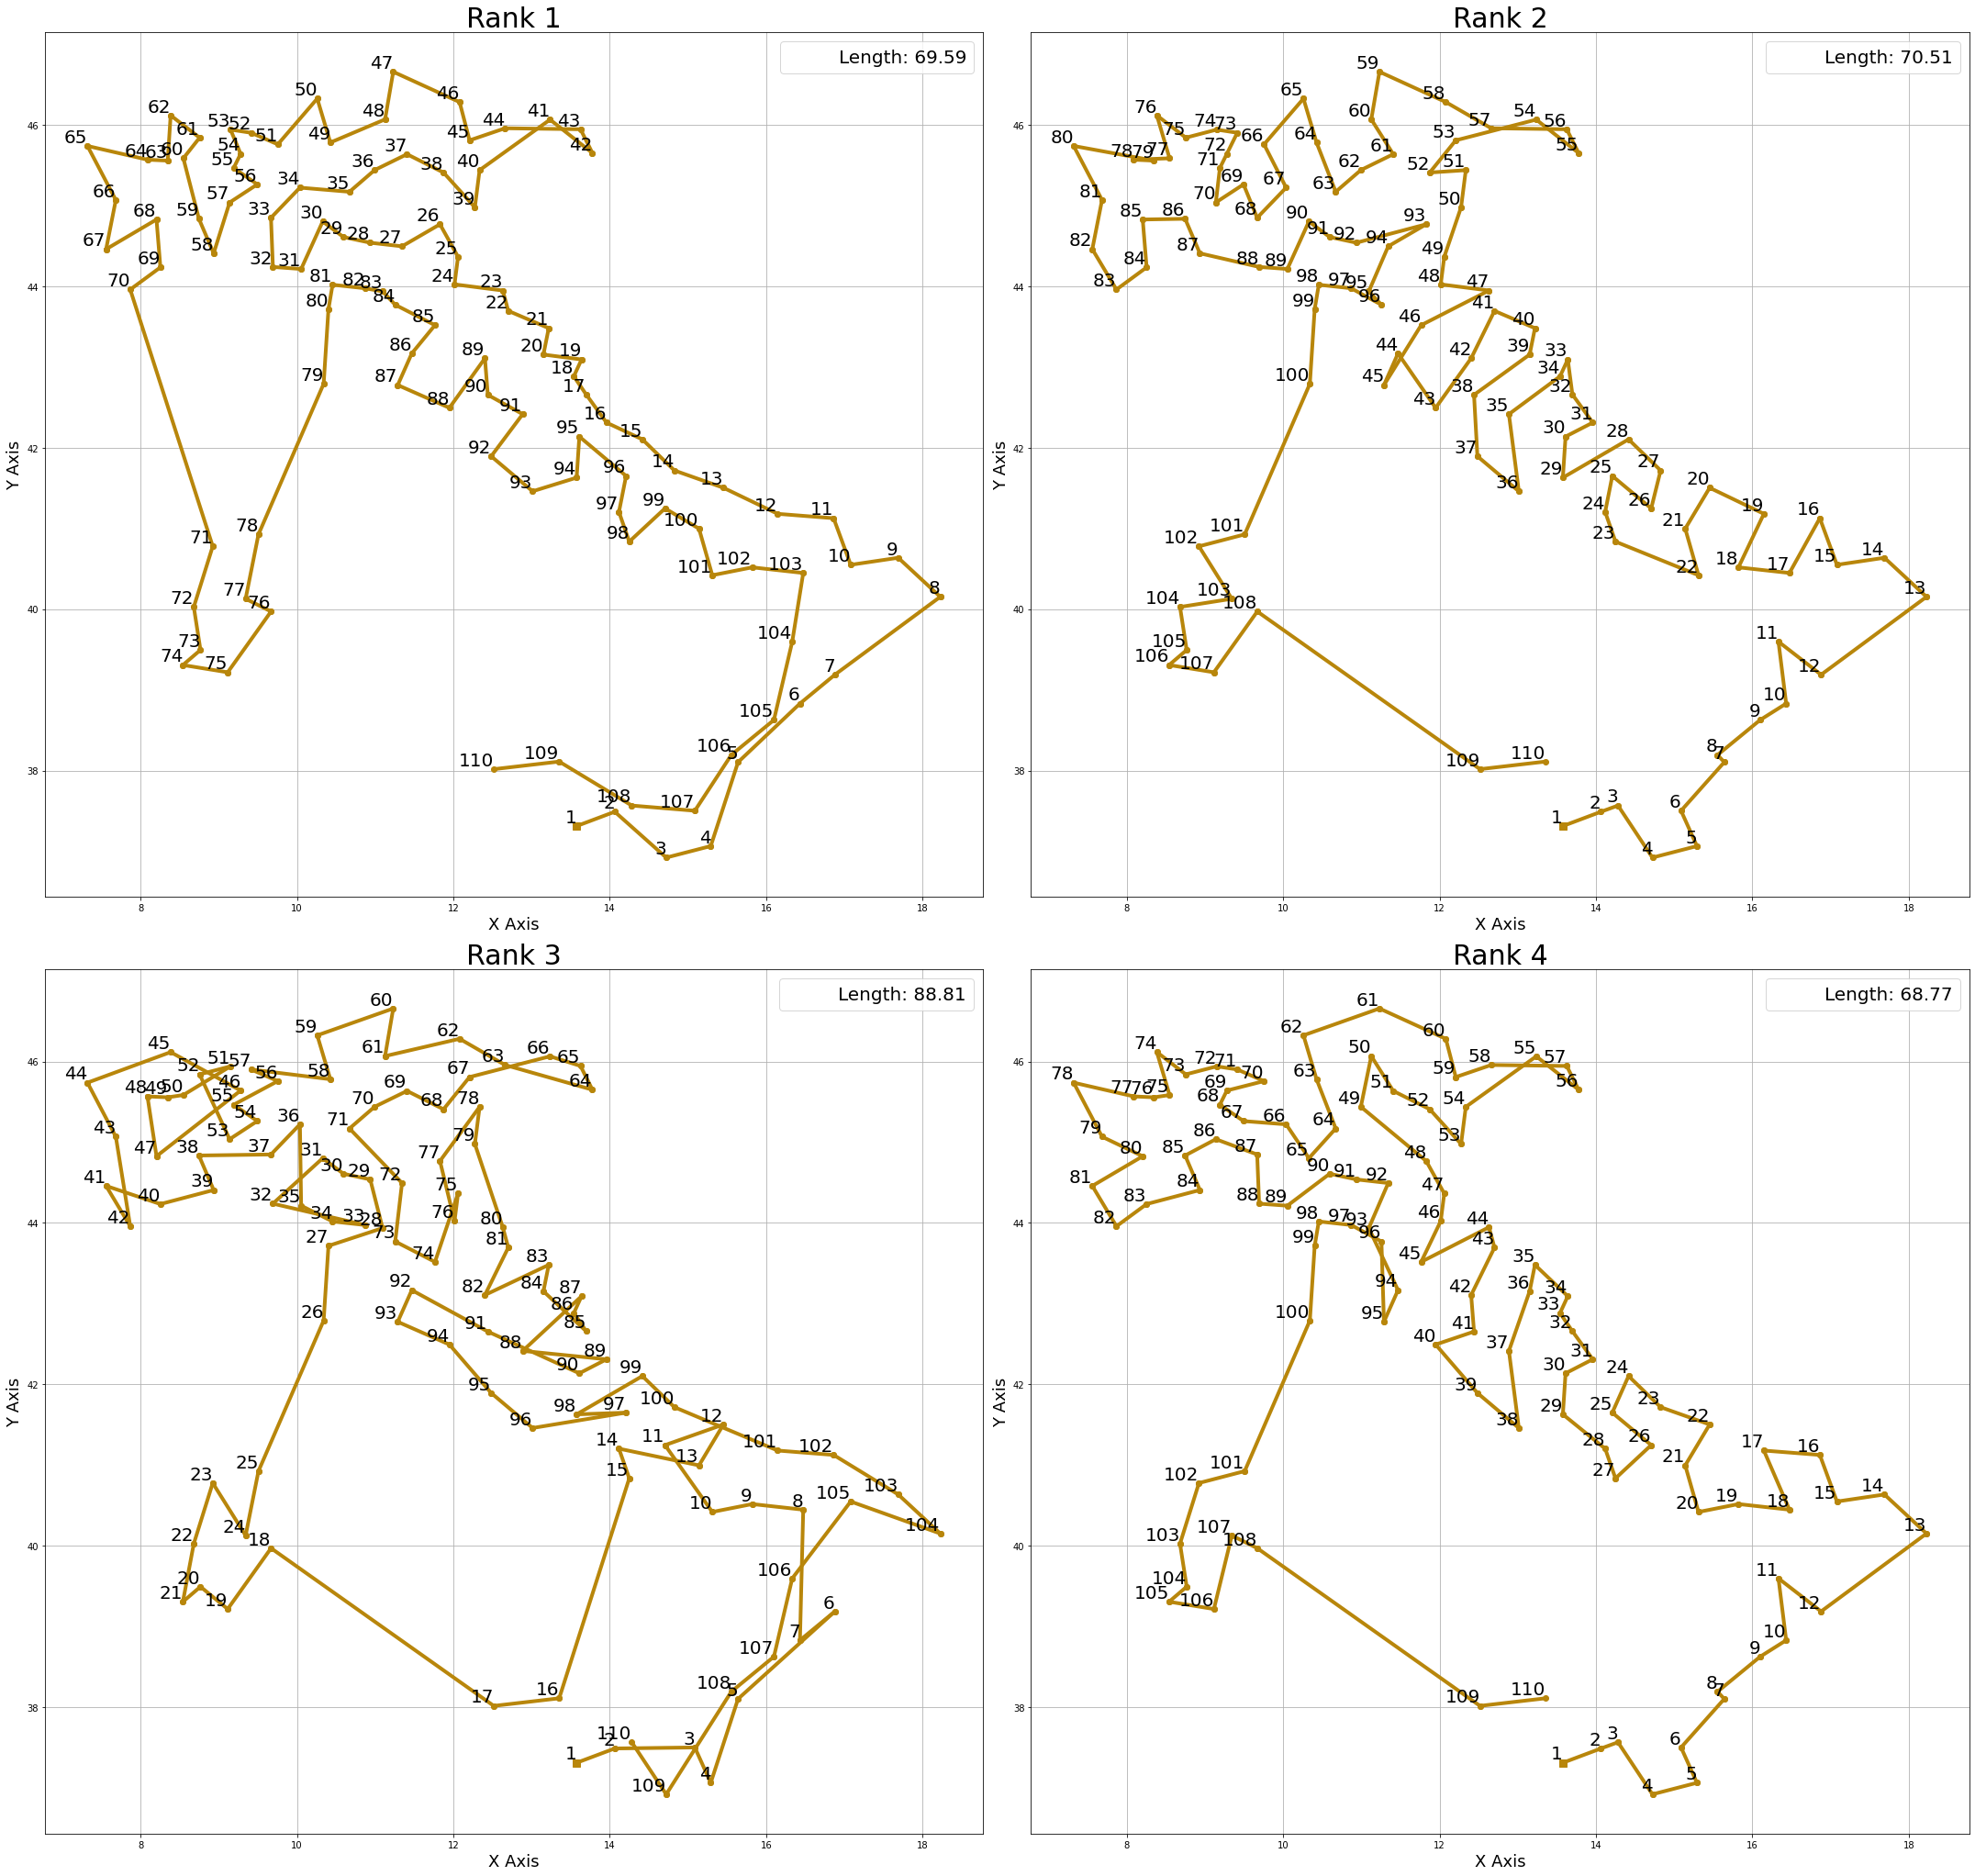

In [343]:
plt.figure(figsize=(30, 30))
line_color = 'darkgoldenrod'

for idx, file_name in enumerate(best_path_file_names):
    data = np.loadtxt(file_name)

    x = data[:, 0]
    y = data[:, 1]

    # Calculate fitness as the total distance of the path, including the return to the start
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    total_distance = np.sum(distances) + np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)

    plt.subplot(2, 2, idx + 1)
    for i in range(len(x) - 1):
        # Line
        plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color=line_color, marker='o', linewidth=4)
        if i == 0 or i == len(x) - 1:
            plt.plot(x[i], y[i], color=line_color, marker='s', markersize=8)
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    plt.text(x[-1], y[-1], str(len(x)), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    custom_label = "Length: {:.2f}".format(total_distance)
    custom_line = Line2D([0], [1], linestyle="none", marker="", color='none', label=custom_label)

    plt.title(f"Rank {idx + 1}", fontsize=30)
    plt.xlabel('X Axis', fontsize=18)
    plt.ylabel('Y Axis', fontsize=18)
    plt.legend(handles=[custom_line], loc='upper right', fontsize=20)
    plt.grid(True)

plt.subplots_adjust(top=0.9)  # Adjust the top space to create space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Further adjust the layout to ensure no overlap with the main title
plt.show()

### Parallel Search 

In [344]:
best_file_names = [
    "Exercise_10.2/OUTPUT/history_best_rank_0_E.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_1_E.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_2_E.txt",
    "Exercise_10.2/OUTPUT/history_best_rank_3_E.txt"
]

avg_file_names = [
    "Exercise_10.2/OUTPUT/history_half_avg_rank_0_E.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_1_E.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_2_E.txt",
    "Exercise_10.2/OUTPUT/history_half_avg_rank_3_E.txt"
]

best_path_file_names = [
    "Exercise_10.2/OUTPUT/best_rank_0_E.txt",
    "Exercise_10.2/OUTPUT/best_rank_1_E.txt",
    "Exercise_10.2/OUTPUT/best_rank_2_E.txt",
    "Exercise_10.2/OUTPUT/best_rank_3_E.txt"
]

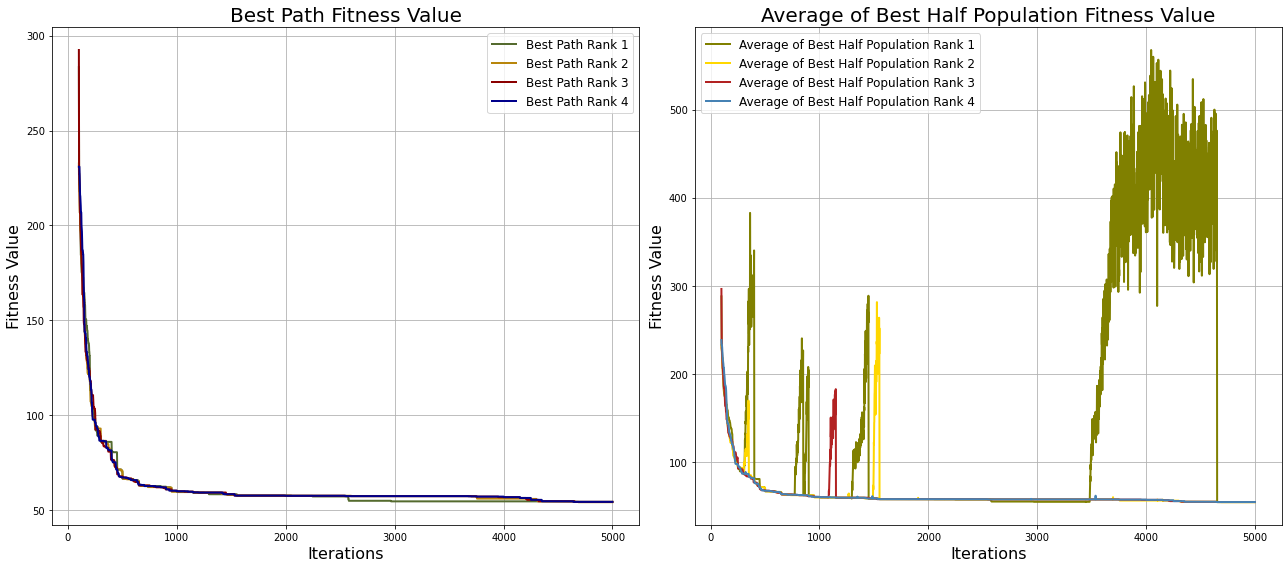

In [345]:
kmin = 100
best_colours = ["darkolivegreen", "darkgoldenrod", "darkred", "darkblue"]
half_colours = ["olive", "gold", "firebrick", "steelblue"]

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for idx in range(len(best_file_names)):
    square_best = np.loadtxt(best_file_names[idx])
    plt.plot(square_best[kmin:, 0], square_best[kmin:, 1], '-', color=best_colours[idx], label=f'Best Path Rank {idx+1}', linewidth=2)

plt.title("Best Path Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
for idx in range(len(avg_file_names)):
    square_avg = np.loadtxt(avg_file_names[idx])
    plt.plot(square_avg[kmin:, 0], square_avg[kmin:, 1], '-', color=half_colours[idx], label=f'Average of Best Half Population Rank {idx+1}', linewidth=2)

plt.title("Average of Best Half Population Fitness Value", fontsize=20)
plt.ylabel("Fitness Value", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

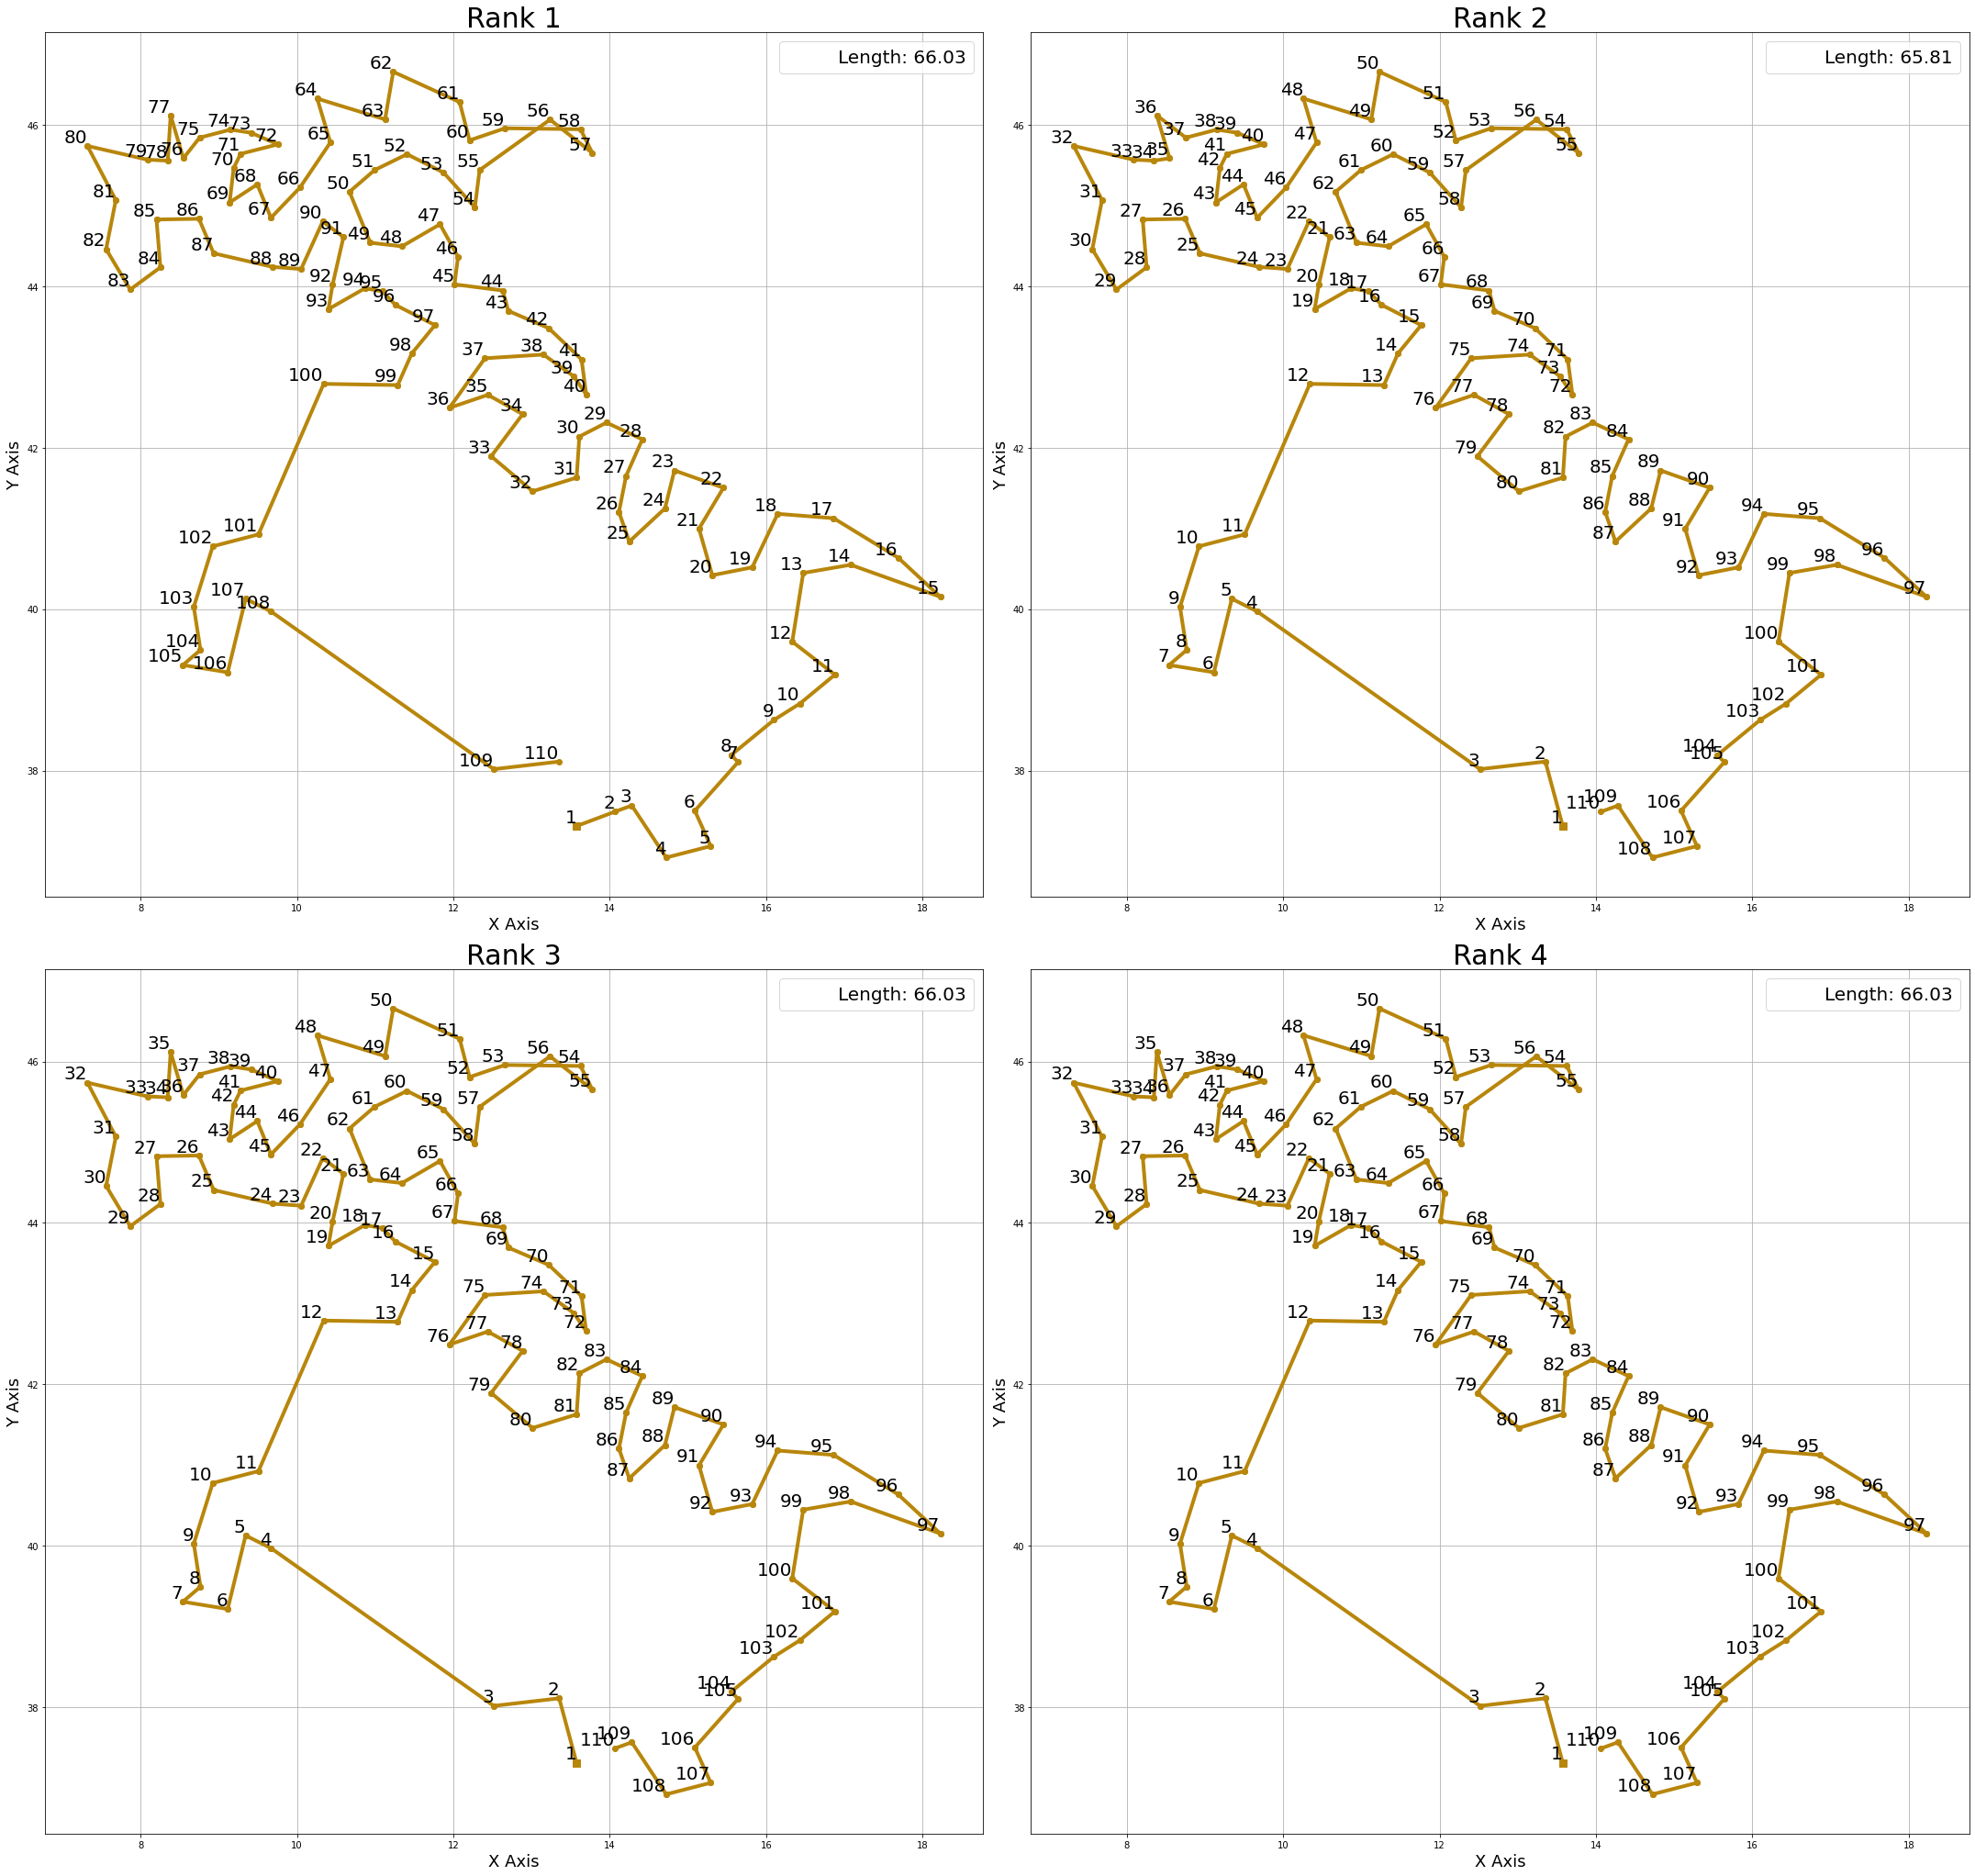

In [346]:
plt.figure(figsize=(30, 30))
line_color = 'darkgoldenrod'

for idx, file_name in enumerate(best_path_file_names):
    data = np.loadtxt(file_name)

    x = data[:, 0]
    y = data[:, 1]

    # Calculate fitness as the total distance of the path, including the return to the start
    distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    total_distance = np.sum(distances) + np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)

    plt.subplot(2, 2, idx + 1)
    for i in range(len(x) - 1):
        # Line
        plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color=line_color, marker='o', linewidth=4)
        if i == 0 or i == len(x) - 1:
            plt.plot(x[i], y[i], color=line_color, marker='s', markersize=8)
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(x[i], y[i], str(i + 1), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    plt.text(x[-1], y[-1], str(len(x)), fontsize=20, verticalalignment='bottom', horizontalalignment='right')

    custom_label = "Length: {:.2f}".format(total_distance)
    custom_line = Line2D([0], [1], linestyle="none", marker="", color='none', label=custom_label)

    plt.title(f"Rank {idx + 1}", fontsize=30)
    plt.xlabel('X Axis', fontsize=18)
    plt.ylabel('Y Axis', fontsize=18)
    plt.legend(handles=[custom_line], loc='upper right', fontsize=20)
    plt.grid(True)

plt.subplots_adjust(top=0.9)  # Adjust the top space to create space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Further adjust the layout to ensure no overlap with the main title
plt.show()

### Conclusion

I've conducted multiple trials to identify the optimal solution to the problem. I observed that a large population size (> 5000) benefits independent searches. For instance, with a population of 10,000 and 500 generations, the algorithm achieved a total path length of 65.94. Conversely, for parallel searches, a smaller population with a higher number of generations proved more effective. Using 1,000 individuals and 5,000 generations, the algorithm achieved a slightly better total path length of 65.81. However, none of the solutions found has proven to be the best since they all contain an intersection.